
                   Data analysis of precovid and post covid pollution in the world(prefrably India)

In [1]:
from pandas import read_csv
from numpy import nan
import seaborn as sns
import matplotlib as mplt
from matplotlib import pyplot as plt 

import pandas as pd
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression




In [2]:

file= read_csv('outdoor-pollution-death-rate.csv')
file1=read_csv('region_pollution.csv')

df_ind=file[2660:2688]#decerease top with 2 and bottom with 1
df_us=file[4143:4171]
df_spain=file[5375:5403]
df_italy=file[2828:2856]
df_china=file[1260:1288]
df_rus =file[4675:4703]
df_iran=file[2716:2744]
df_fra=file[2044:2072]
df_aus=file[308:336]
df_ger=file[2156:2184]
df_bangla=file[458:476]
df_jap=file[2884:2912]
df_nor_ko=file[4171:4199]

fi_country=[df_ind,df_us,df_spain,df_italy,df_china,df_rus,df_iran,df_fra,df_aus,df_ger,df_bangla,df_jap,df_nor_ko]

df_main=pd.DataFrame()





#df_ind.describe()



In [3]:
#df=file.head(n=280)
#new_df=pd.DataFrame()
#df_main.head()

for i in fi_country:
    df_main=pd.concat([df_main,i],ignore_index=True)

df_main.describe()

,Year,"Outdoor air pollution death rates (deaths per 100,000)"
count,354.000000,354.000000
mean,2003.754237,42.935311
std,8.043018,25.497525
min,1990.000000,10.570000
25%,1997.000000,20.970000
50%,2004.000000,30.000000
75%,2011.000000,68.367500
max,2017.000000,92.660000


In [26]:
print((df_main.isnull()).sum())
#df_main.head

Entity                                                     0
Code                                                      28
Year                                                       0
Outdoor air pollution death rates (deaths per 100,000)     0
dtype: int64


file.isnull().sum()

In [27]:
df_main['Entity'].value_counts()


Japan            28
Australia        28
North Korea      28
Germany          28
Iran             28
Italy            28
India            28
China            28
Russia           28
North America    28
France           28
Spain            28
Bangladesh       18
Name: Entity, dtype: int64

In [28]:
df_main.drop('Code',axis=1)

,Entity,Year,"Outdoor air pollution death rates (deaths per 100,000)"
0,India,1990,82.98
1,India,1991,83.55
2,India,1992,84.20
3,India,1993,82.98
4,India,1994,82.28
...,...,...,...
349,North Korea,2013,69.01
350,North Korea,2014,67.16
351,North Korea,2015,68.78
352,North Korea,2016,63.47


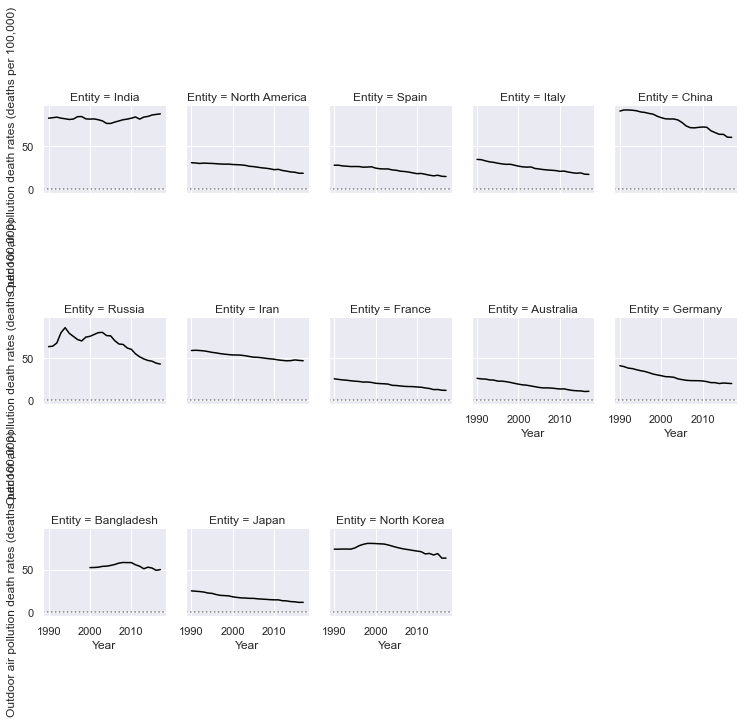

In [29]:
%matplotlib inline
sns.set(style="darkgrid")
#plt.subplots(figsize=(14,6))
#ax=sns.scatterplot(x="Year", y="Outdoor air pollution death rates (deaths per 100,000)",hue='Entity',data=df_main)


g = sns.FacetGrid(df_main, col="Entity",col_wrap=5, height=3, aspect=.7,palette="tab20c")

g.map(plt.axhline, y=0, ls=":", c=".5")
g.map(plt.plot, "Year", "Outdoor air pollution death rates (deaths per 100,000)",color='00000');
g.fig.tight_layout(w_pad=1)


plt.show()



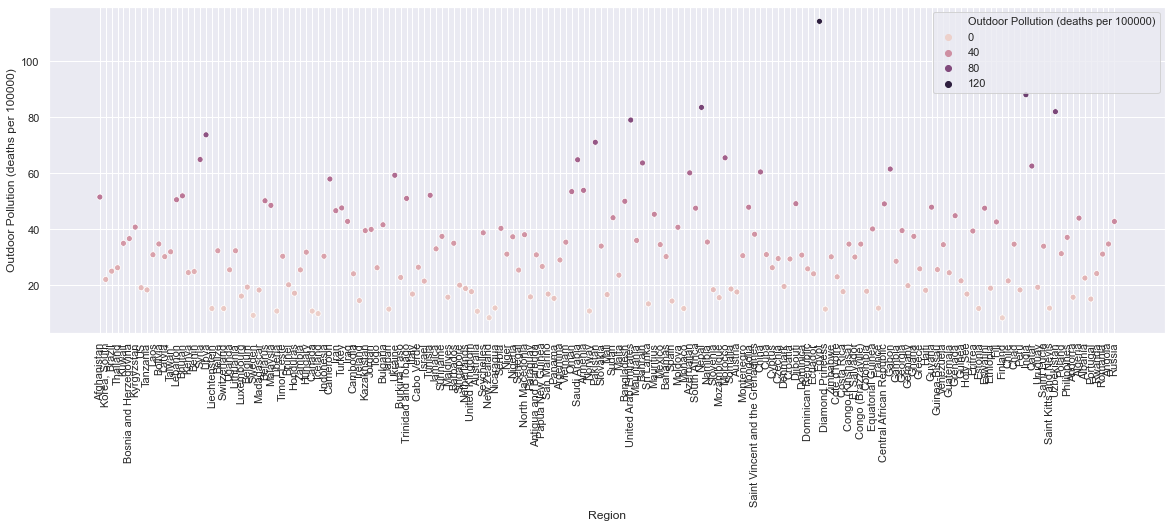

In [30]:

plt.subplots(figsize=(20,6))
sns.scatterplot(x=file1['Region'],y=file1['Outdoor Pollution (deaths per 100000)'],data=file1,hue='Outdoor Pollution (deaths per 100000)')

#for i in file1['Outdoor Pollution (deaths per 100000)']:
#    if i>40:
#        sns.scatterplot(x=file1[file1['Outdoor Pollution (deaths per 100000)']==i]['Region'], y=i,palette='black')
    

degrees = 90
#ax.tick_params(direction='out', length=6, width=2, colors='r',
#               grid_color='b', grid_alpha=0.5)
plt.xticks(rotation=degrees)
plt.show()


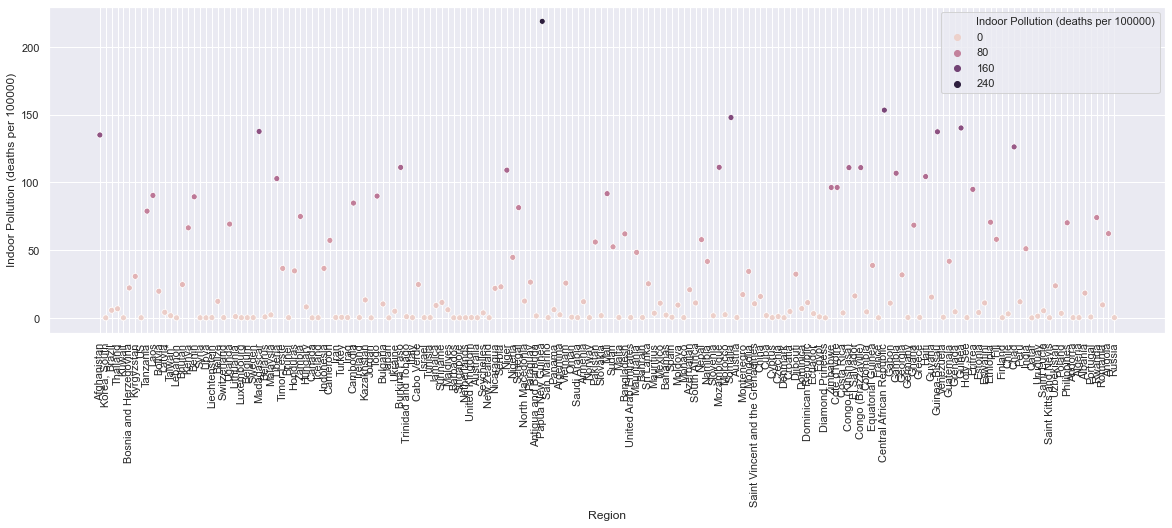

In [31]:

plt.subplots(figsize=(20,6))
sns.scatterplot(x=file1['Region'],y=file1['Indoor Pollution (deaths per 100000)'],data=file1,hue='Indoor Pollution (deaths per 100000)')
degrees = 90
plt.xticks(rotation=degrees)
plt.show()


In [32]:
aqi_emission=pd.read_excel('aqi.xlsx')
#k=aqi_emission.pop('S.No')

#pd.array(pd.array(aqi_emission['Current AQI value'],dtype="Int64"))



In [33]:

aqi_emission.head()

,state,Month,Current AQI value
0,AP,January,157.0
1,AP,February,107.0
2,AP,March,84.0
3,AP,April,69.0
4,AP,May,86.0


In [34]:
aqi_emission.describe()


,Current AQI value
count,99.000000
mean,177.383838
std,95.056343
min,24.000000
25%,105.500000
50%,147.000000
75%,238.500000
max,442.000000


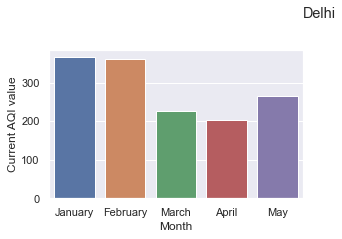

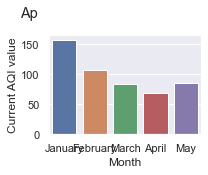

In [35]:
plt.subplots(figsize=(10,6))
plt.subplot(2,2,1)
sns.barplot(x=aqi_emission[aqi_emission['state']=='Delhi']['Month'],y="Current AQI value",data=aqi_emission)
plt.suptitle('Delhi')
plt.show()
plt.subplot(2,2,2)
sns.barplot(x=aqi_emission[aqi_emission['state']=='AP']['Month'],y="Current AQI value",data=aqi_emission)
plt.suptitle('Ap')
plt.show()


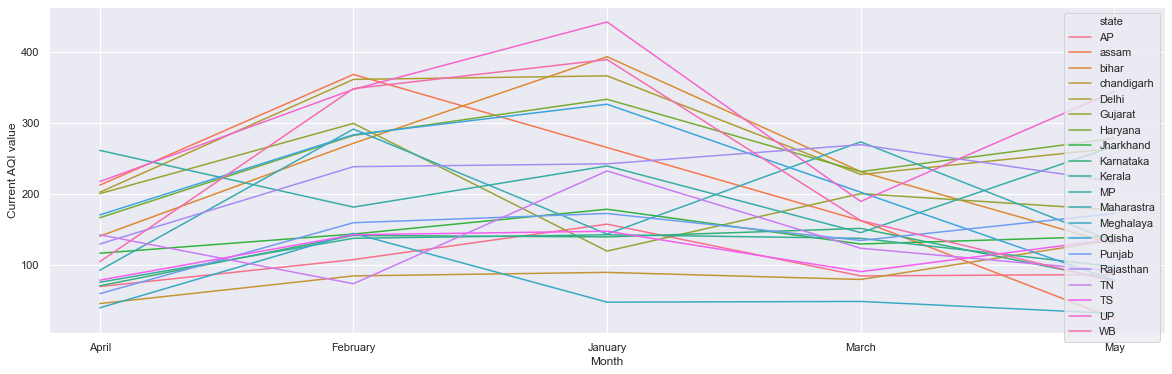

In [36]:
plt.subplots(figsize=(20,6))
sns.lineplot(x="Month",y="Current AQI value",hue='state',data=aqi_emission)

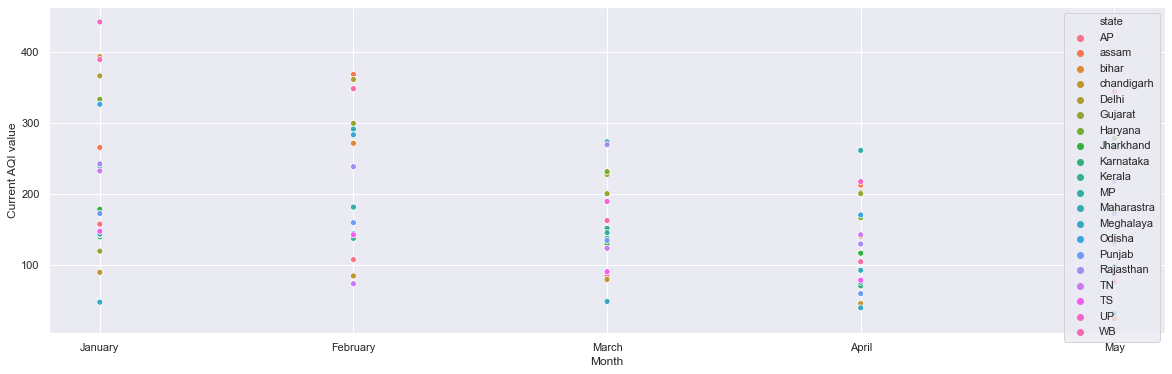

In [37]:
plt.subplots(figsize=(20,6))
sns.scatterplot("Month","Current AQI value",hue='state',data=aqi_emission)
plt.legend(loc='upper right')

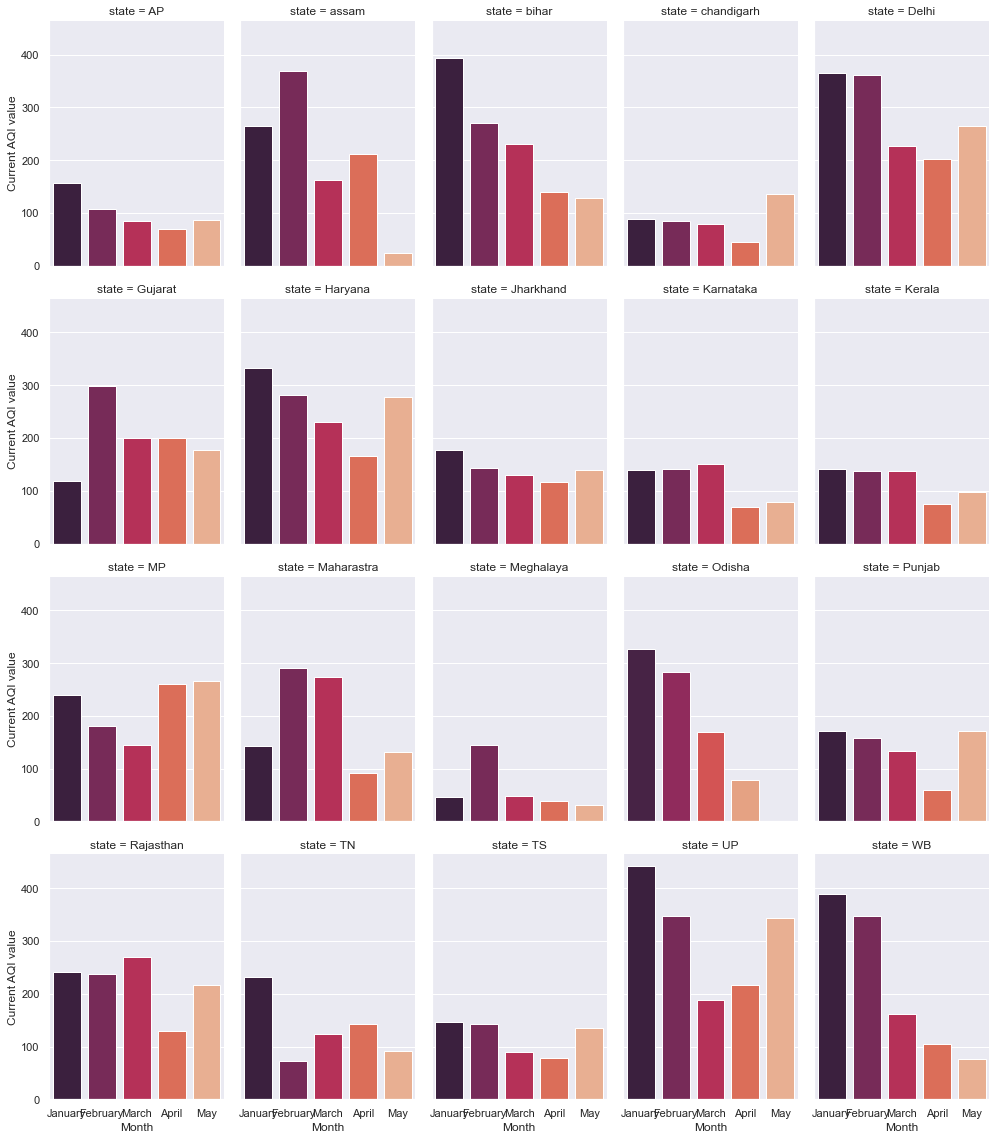

In [74]:

g = sns.FacetGrid(aqi_emission, col="state",col_wrap=5, height=4, aspect=.7,palette="rocket")
g.map(sns.barplot, "Month", "Current AQI value",palette='rocket');

In [62]:
energy_coal=pd.read_excel('energy.txt 1.xlsx')
total_energy_data=pd.read_excel('daily_max.txt.xlsx')
energy_wind=pd.read_excel('wind.txt.xlsx')
energy_solar=pd.read_excel('solar.txt.xlsx')
energy_hydro=pd.read_excel('hydro.txt.xlsx')


In [63]:
energy_coal.head()
energy_coal.describe()
(energy_coal.isnull()).sum()
energy_coal.describe()


,NR,SR,TOTAL
count,122.000000,122.000000,122.000000
mean,837.204918,436.598361,3389.852459
std,208.591813,408.652425,244.837732
min,100.000000,0.000000,2592.000000
25%,806.250000,103.000000,3295.750000
50%,911.000000,111.500000,3420.500000
75%,957.250000,909.000000,3566.500000
max,997.000000,990.000000,3757.000000


In [64]:
total_energy_data.head()

,Date,NR,WR,SR,ER,NER,TOTAL,Diversity Factor
0,2019-12-01,39073,50397,34786,17879,2369,139317,1.037
1,2019-12-02,42849,52276,37003,18485,2426,148420,1.031
2,2019-12-03,42947,52507,38532,18542,2497,150537,1.030
3,2019-12-04,44607,53763,39248,18100,2478,152488,1.037
4,2019-12-05,45103,53904,39387,18007,2538,152508,1.042


Text(0.5, 1.0, 'max energy at national level')

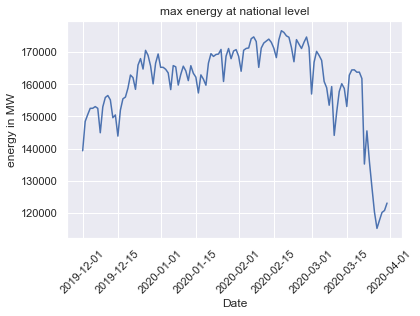

In [80]:
#plt.subplots(figsize=(7,6))



sns.lineplot("Date","TOTAL",data=total_energy_data)

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("energy in MW")
plt.title("max energy at national level")

#plt.subplot(2,2,2)


#plt.subplot(2,2,3)


#plt.subplot(2,2,4)





Text(0.5, 1.0, 'coal')

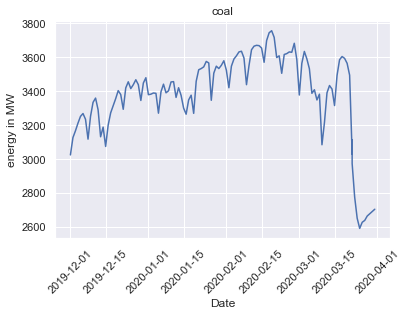

In [71]:
plt.plot("Date","TOTAL",data=energy_coal)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("energy in MW")
plt.title("coal")

Text(0.5, 1.0, 'hydro power plants')

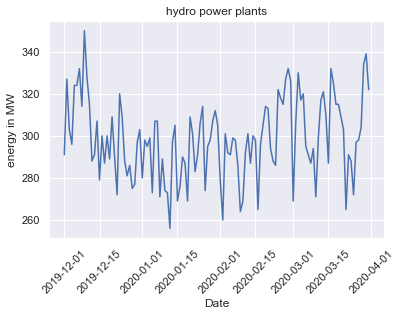

In [70]:
plt.plot("Date","TOTAL",data=energy_hydro)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("energy in MW")
plt.title("hydro power plants")

Text(0.5, 1.0, 'hydro power plants')

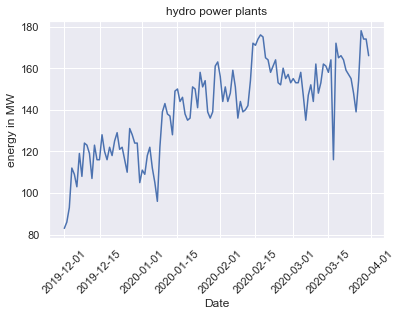

In [72]:
plt.plot("Date","TOTAL",data=energy_solar)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("energy in MW")
plt.title("hydro power plants")

In [2]:
data=pd.read_excel("total_deaths_and_carbon_budget.xlsx")
data.head()

,Year,Total,coal,Oil,Gas,Cement,Flaring,Per Capita,deaths(per 100000)
0,2005,8024,3170,3000,1473,262,82,1.23,8888.44
1,2006,8290,3350,3022,1511,285,83,1.25,8819.71
2,2007,8538,3511,3032,1561,306,87,1.27,8753.54
3,2008,8732,3646,3041,1606,310,90,1.29,8648.24
4,2009,8606,3603,2992,1571,320,88,1.25,8585.57


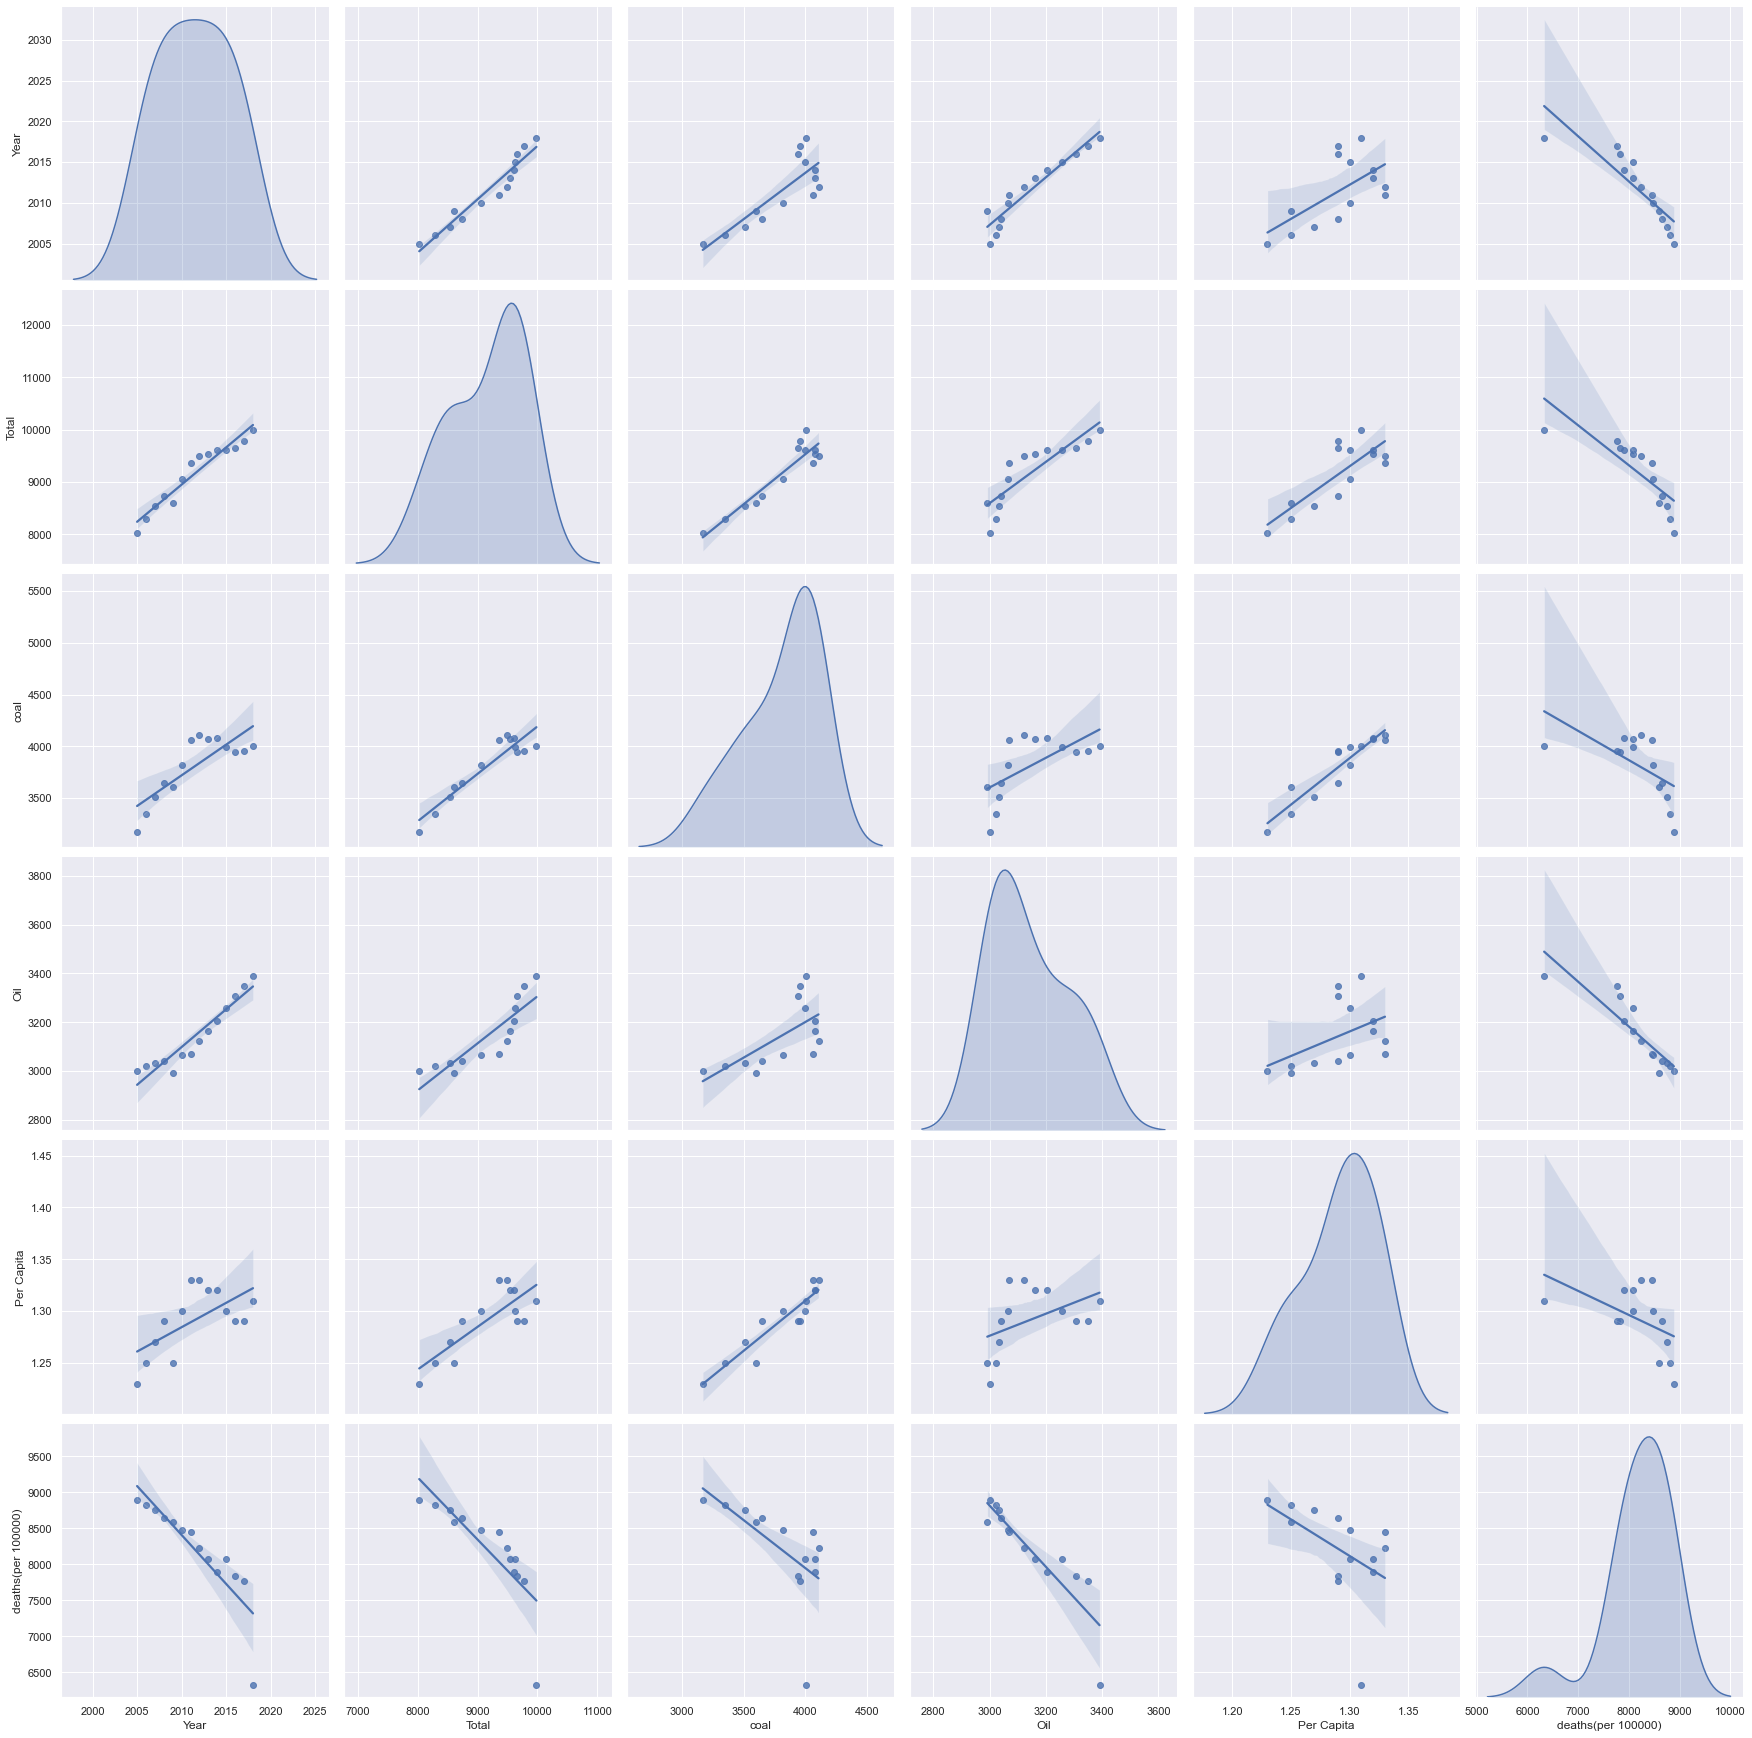

In [76]:
sns.pairplot(data,kind='reg',diag_kind = 'kde',vars=["Year","Total","coal","Oil","Per Capita","deaths(per 100000)"],
             size = 4)

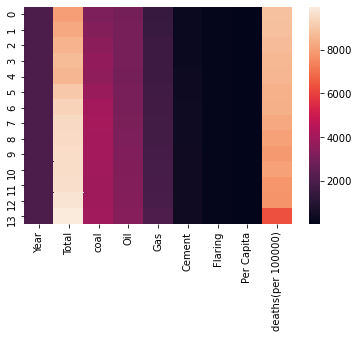

In [3]:
sns.heatmap(data,center=)

In [77]:
book=pd.read_excel("Book 2.xlsx",index=None)
#book=book.transpose()
book.head()


,DAY,DATE,Argentina,Australia,Belgium,Brazil,Canada,China,Denmark,Egypt,...,Spain,Sweden,Turkey,Ukraine,United Arab Emirates,United Kingdom,USA,Vietnam,EU and UK,GLOBAL
0,1,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


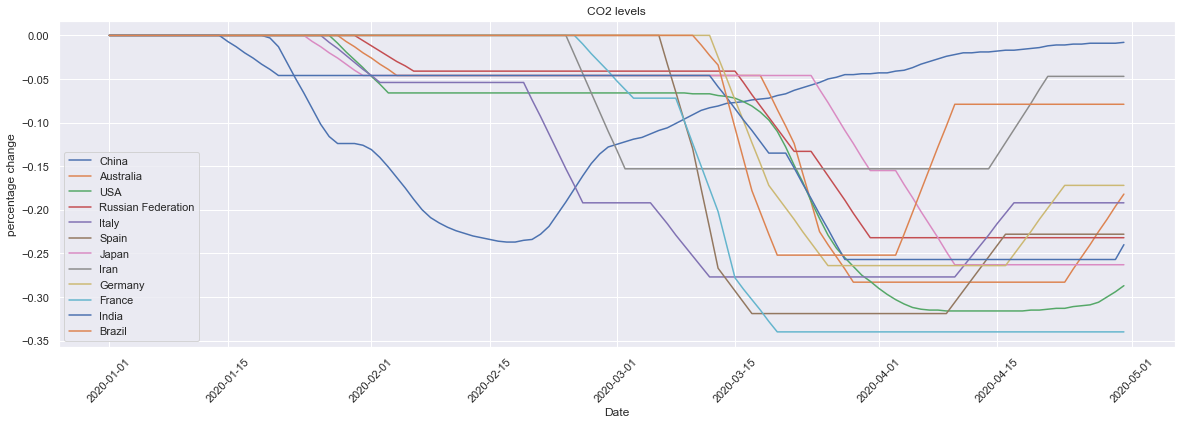

In [78]:
countries=[
'China',            
'Australia',        
'USA',    
'Russian Federation',           
'Italy' ,           
'Spain',           
'Japan',            
'Iran' ,            
'Germany'   ,       
'France' ,          
'India'   ,         
'Brazil']
plt.subplots(figsize=(20,6))
for i in countries:
    sns.lineplot(book['DATE'],book[i], markers=True, dashes=False,)



plt.xticks(rotation=46)

plt.xlabel("Date")
plt.ylabel("percentage change")
plt.title("CO2 levels")
plt.legend(['China',            
'Australia',        
'USA',    
'Russian Federation',           
'Italy' ,           
'Spain',           
'Japan',            
'Iran' ,            
'Germany'   ,       
'France' ,          
'India'   ,         
'Brazil'])
plt.show()


In [79]:
#index=book['DATE']
book=book.transpose()
#wide_df = pd.DataFrame(data, index, ["a", "b", "c", "d"])
sns.lineplot(x='DATE',y=countries,data=book)
plt.show()

ValueError: Could not interpret input 'DATE'